problem 6: Obtain  the  images  camera.bin,  salesman.bin,  head.bin,  and  eyeR.bin  from  the 
course  web site. These are 256×256 grayscale images with 8 bpp and pixel values in the 
range 0 to 255.  For each one, show the original image, the real part of the centered DFT, the  imaginary  part  of  the  centered  DFT,  the  centered  DFT  log-magnitude  spectrum, and the phase of the centered DFT as 8 bpp images with full-scale contrast.


problem 7:  Let  I6  be  the  Cameraman  image  from  the  file  camera.bin.  Define  a  new  image  J1 
according  to  |J1| =  |I6| and  arg J1  =  0.  Define  another  new  image  J2  according  to 
|J2| = 1 and  arg J2 = arg I6.  To  within  floating  point  roundoff,  J1 and  J2 will  both 
be  real  (discard  any  nonzero  imaginary  part). J1  illustrates  the  contribution  of  the 
DFT magnitude to the original image, while J2 illustrates the contribution of the DFT 
phase to the original image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#hàm đọc ảnh từ file nhị phân có kích thước 256x256
def read_bin_image(filename, shape=(256,256)):
    with open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8)
    return data.reshape(shape)

In [4]:
#hàm tính DFT của ảnh
def process_image(filename):
    """
    Đọc ảnh từ file, tính DFT căn giữa, sau đó trả về:
    - I: ảnh gốc (float)
    - F: DFT đã căn giữa
    - F_real, F_imag: phần thực và phần ảo của DFT
    - log_mag: phổ log-magnitude (log(1+|F|))
    - phase: pha của DFT (angle)
    """
    # Đọc ảnh và chuyển sang float để xử lý
    I = read_bin_image(filename).astype(np.float32)
    
    # Tính DFT 2D của ảnh
    F = np.fft.fft2(I)
    F_centered = np.fft.fftshift(F)
    
    # Tính các thành phần: phần thực, phần ảo, log-magnitude và pha
    F_real = F_centered.real
    F_imag = F_centered.imag
    mag = np.abs(F_centered)
    log_mag = np.log(1 + mag)  # log compression để dễ hiển thị
    phase = np.angle(F_centered)
    
    return I, F_centered, F_real, F_imag, log_mag, phase

In [5]:
#hàm hiển thị cac thành phần của DFT dưới dạng ảnh 8bpp đã scale về [0,255]
def display_dft_components(I, F_real, F_imag, log_mag, phase, title_prefix=""):
    plt.figure(figsize=(12, 8))
    plt.subplot(2,3,1)
    plt.imshow(I, cmap='gray')
    plt.title(f"{title_prefix} - Original")
    plt.axis("off")
    
    plt.subplot(2,3,2)
    plt.imshow(F_real, cmap='gray')
    plt.title(f"{title_prefix} - DFT Real")
    plt.axis("off")
    
    plt.subplot(2,3,3)
    plt.imshow(F_imag, cmap='gray')
    plt.title(f"{title_prefix} - DFT Imag")
    plt.axis("off")
    
    plt.subplot(2,3,5)
    plt.imshow(log_mag, cmap='gray')
    plt.title(f"{title_prefix} - Log-Magnitude")
    plt.axis("off")
    
    plt.subplot(2,3,6)
    plt.imshow(phase, cmap='gray')
    plt.title(f"{title_prefix} - Phase")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

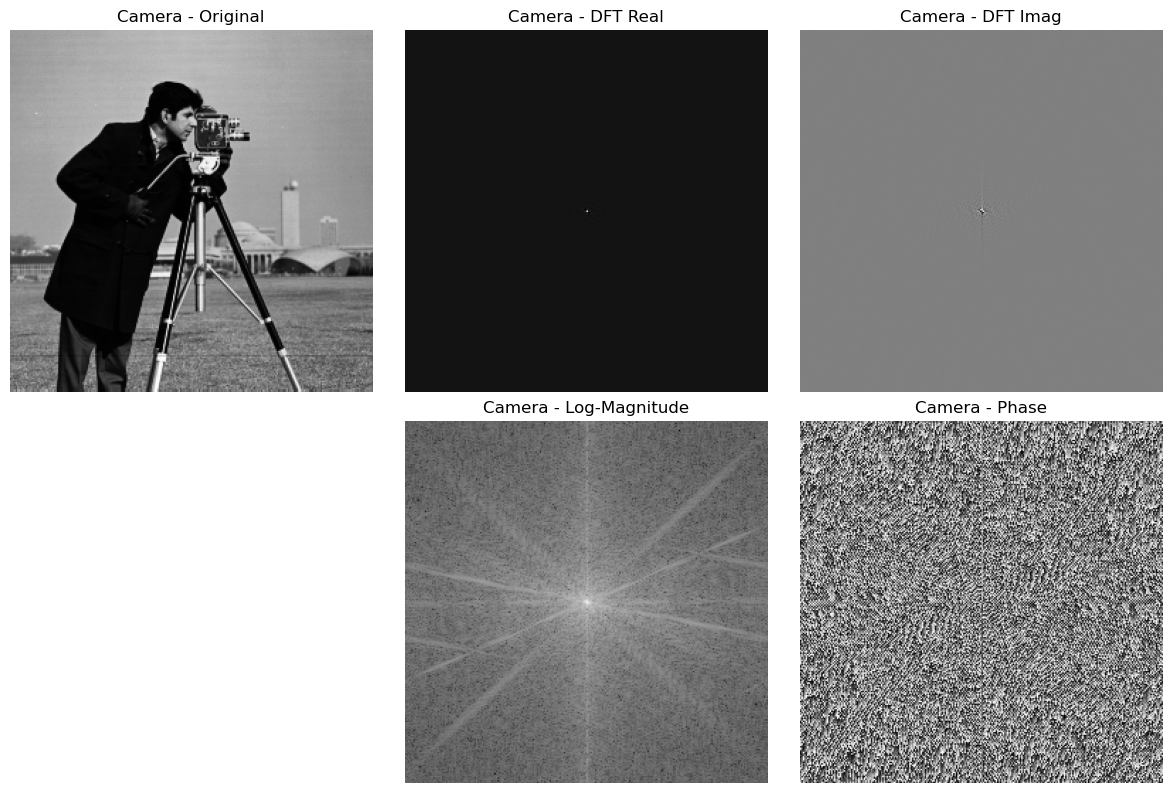

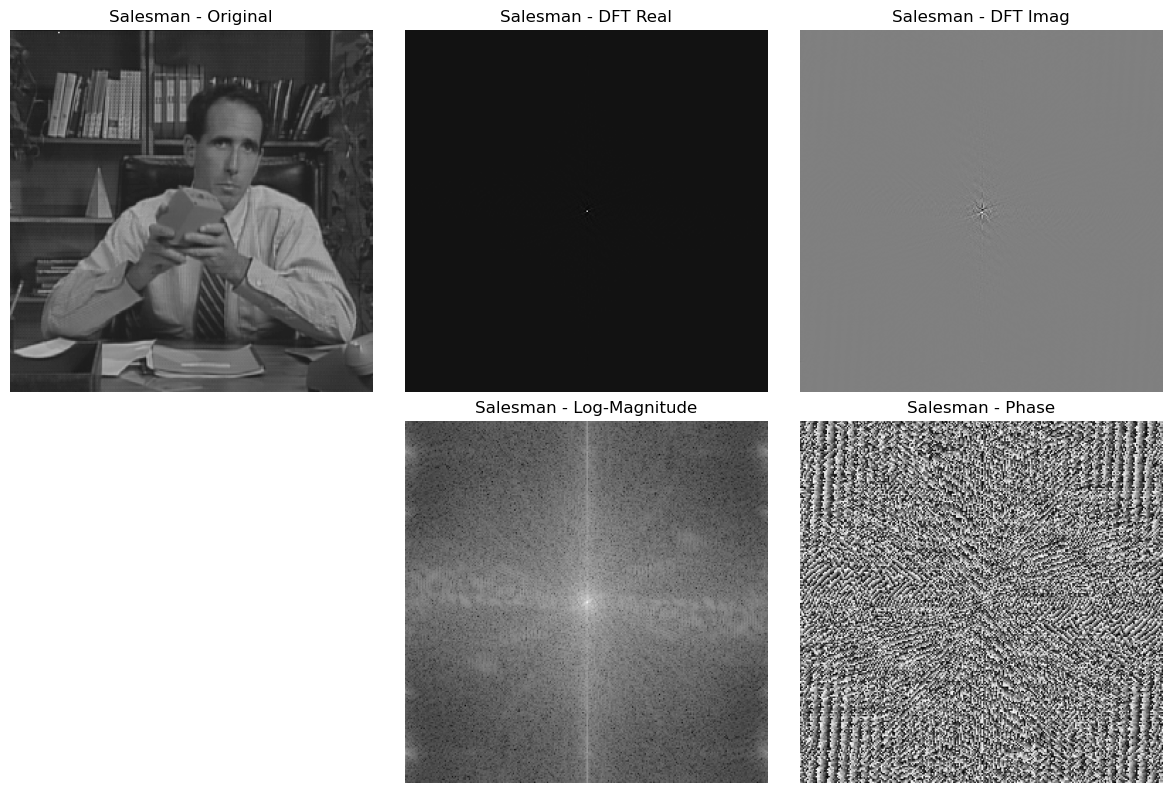

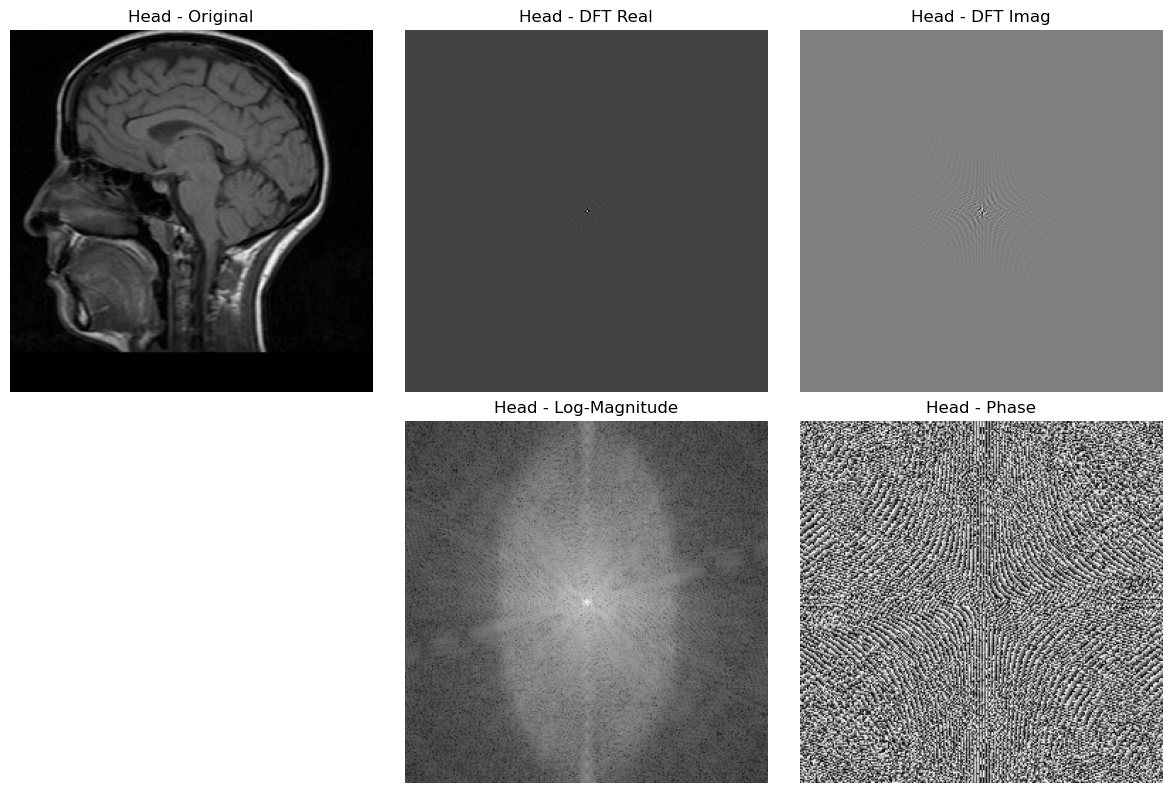

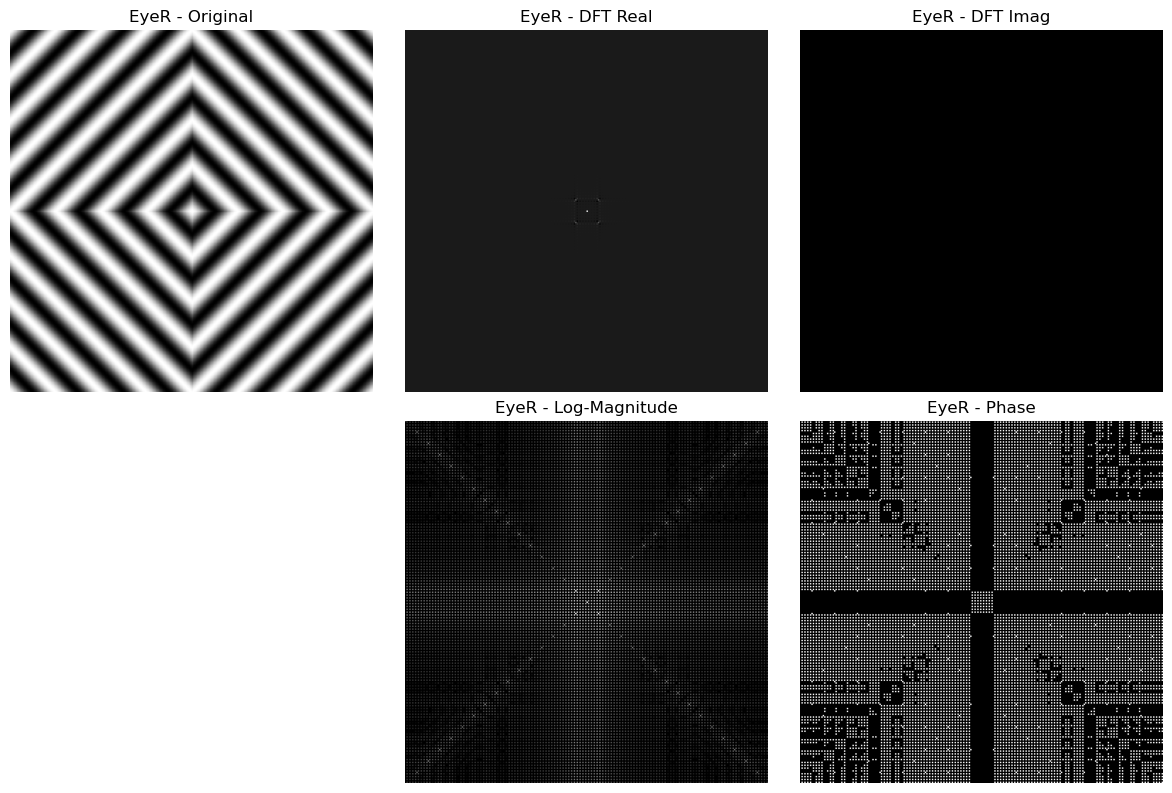

In [ ]:
#bài 6 : phan tích dft của các ảnh 256x256
#danh sách các file ảnh cần phân tích
files = ["camera.bin", "salesman.bin", "head.bin", "eyeR.bin"]
titles = ["Camera", "Salesman", "Head", "EyeR"]

for fname, t in zip(files, titles):
    I, F, F_real, F_imag, log_mag, phase = process_image(fname)
    display_dft_components(I, F_real, F_imag, log_mag, phase, title_prefix=t)

In [7]:
# --- Bài 7: Tách thành phần biên độ và pha của DFT (cho ảnh cameraman - camera.bin) ---
# đọc ảnh cameraman
I6 = read_bin_image("camera.bin").astype(np.float32)
# tính DFT
F6 = np.fft.fft2(I6)

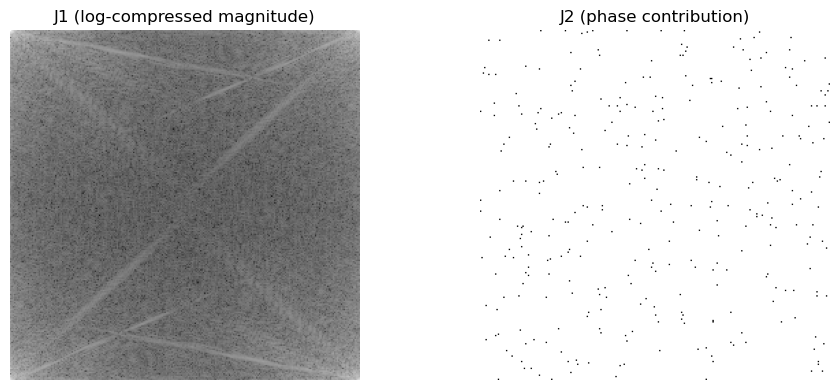

In [8]:
# Tách thành phần:
# J1: chỉ giữ biên độ của F, đặt pha = 0
# J2: đặt biên độ = 1, giữ pha của F
mag_F6 = np.abs(F6)
phase_F6 = np.angle(F6)

f_j1 = mag_F6 * np.exp(1j * np.zeros_like(phase_F6)) # nghĩa là f_j1 = mag_F6 thành phần pha = 0
f_j2 = np.exp(1j * phase_F6) # chỉ giữ thông tin pha


#tính iverted DFT để thu được ảnh trong không gian 
#dùng np.fft.ifft2 để lấy phần thực của kết quả
I_j1 = np.fft.ifft2(f_j1).real
I_j2 = np.fft.ifft2(f_j2).real


#vì j1 có giá trị lớn ở một số pixel, ta thực hiện log compression để hiển thị
JJ1 = np.log(1 + np.abs(f_j1)) # cộng thêm 1 để tránh log(0)
JJ2 = np.log(1 + np.abs(f_j2))



# hàm hiển thị ảnh dưới dạng ảnh 8bpp đã scale về [0,255]
def scale_to_8bpp(img):
    img_min, img_max = img.min(), img.max()
    return ((img - img_min) / (img_max - img_min) * 255).astype(np.uint8)
JJ2_disp = scale_to_8bpp(JJ2)
JJ1_disp = scale_to_8bpp(JJ1)

#hiển thị ảnh
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(JJ1_disp, cmap='gray')
plt.title("J1 (log-compressed magnitude)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(JJ2_disp, cmap='gray')
plt.title("J2 (phase contribution)")
plt.axis("off")
plt.tight_layout()
plt.show()
